In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
!pip install ann_visualizer

  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4167 sha256=309c1c0cbe8cd3b89db3c96c52b9390759fe25b8bf7784727fe98d445f5cc8fd
  Stored in directory: /root/.cache/pip/wheels/6e/0f/ae/f5dba91db71b1b32bf03d0ad18c32e86126093aba5ec6b6488
Successfully built ann_visualizer


In [2]:
# keras - another framework, built on tf

In [3]:
from keras.datasets import boston_housing

In [5]:
(train_set_x, train_set_y), (test_set_x, test_set_y) = boston_housing.load_data()

In [7]:
print(train_set_x.shape, train_set_y.shape, test_set_x.shape, test_set_y.shape)

(404, 13) (404,) (102, 13) (102,)


In [8]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(train_set_x)

MinMaxScaler()

In [11]:
train_set_x = min_max_scaler.fit_transform(train_set_x)
test_set_x = min_max_scaler.fit_transform(test_set_x)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
model = Sequential(name = 'ANN_Boston_Housing_Price_Prediction')
model.add(Dense(200, input_dim = train_set_x.shape[1], activation = 'relu', name = 'Input_layer')) #output of first layer=200, have to mention the input of the first layer (number of features)
model.add(Dense(150, activation = 'relu', name = 'Hidden_layer_1')) #not flexible like pytorch. Ek ke baad dusra join hoga (Sequential), so don't need to mention input of hidden layers
model.add(Dense(100, activation = 'relu', name = 'Hidden_layer_2'))
model.add(Dense(50, activation = 'relu', name = 'Hidden_layer_3'))
model.add(Dense(1, activation = 'linear', name = 'Output_layer')) #by default relu, so need to mention. we don't need any activation in the last layer in this dataset

In [26]:
model.compile(optimizer='Adam', loss='mse', metrics=['mae'])

In [27]:
model.summary() # none because of different batch size

Model: "ANN_Boston_Housing_Price_Prediction"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 200)               2800      
                                                                 
 Hidden_layer_1 (Dense)      (None, 150)               30150     
                                                                 
 Hidden_layer_2 (Dense)      (None, 100)               15100     
                                                                 
 Hidden_layer_3 (Dense)      (None, 50)                5050      
                                                                 
 Output_layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 53,151
Trainable params: 53,151
Non-trainable params: 0
_________________________________________________________________


In [28]:
hist = model.fit(train_set_x, train_set_y, batch_size=40, epochs = 100, validation_split=0.2)

Epoch 1/100
9/9 [==============================] - 2s 31ms/step - loss: 564.4296 - mae: 21.9004 - val_loss: 612.4868 - val_mae: 22.9462
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 509.6914 - mae: 20.4968 - val_loss: 491.2996 - val_mae: 19.9861
Epoch 3/100
9/9 [==============================] - 0s 9ms/step - loss: 332.8094 - mae: 15.3867 - val_loss: 206.0133 - val_mae: 11.4354
Epoch 4/100
9/9 [==============================] - 0s 8ms/step - loss: 152.3610 - mae: 9.8993 - val_loss: 137.4792 - val_mae: 9.3078
Epoch 5/100
9/9 [==============================] - 0s 9ms/step - loss: 117.5374 - mae: 8.3200 - val_loss: 118.7040 - val_mae: 8.0728
Epoch 6/100
9/9 [==============================] - 0s 9ms/step - loss: 91.4335 - mae: 6.9061 - val_loss: 82.5039 - val_mae: 6.5008
Epoch 7/100
9/9 [==============================] - 0s 9ms/step - loss: 67.5708 - mae: 6.1875 - val_loss: 65.3562 - val_mae: 5.8425
Epoch 8/100
9/9 [==============================] - 0s 7ms/step - l

In [29]:
hist.history

{'loss': [564.4296264648438,
  509.6913757324219,
  332.8094177246094,
  152.36097717285156,
  117.537353515625,
  91.43348693847656,
  67.57075500488281,
  57.3868293762207,
  51.156578063964844,
  47.81356430053711,
  44.37095260620117,
  41.6031608581543,
  37.39738845825195,
  34.994571685791016,
  32.760009765625,
  29.030479431152344,
  27.49700927734375,
  24.80358123779297,
  23.34868049621582,
  23.056005477905273,
  21.275205612182617,
  20.075963973999023,
  23.5921630859375,
  19.85376739501953,
  18.382829666137695,
  18.255613327026367,
  22.51858139038086,
  18.189491271972656,
  17.617538452148438,
  17.421266555786133,
  15.896952629089355,
  16.714630126953125,
  17.076568603515625,
  18.100933074951172,
  16.235654830932617,
  14.823594093322754,
  13.917141914367676,
  14.593440055847168,
  13.32754135131836,
  13.278645515441895,
  22.38629150390625,
  21.02238655090332,
  15.168167114257812,
  13.435657501220703,
  11.936671257019043,
  12.143321990966797,
  20.05

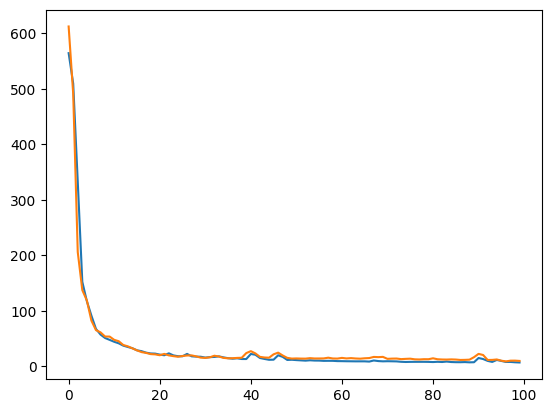

In [31]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

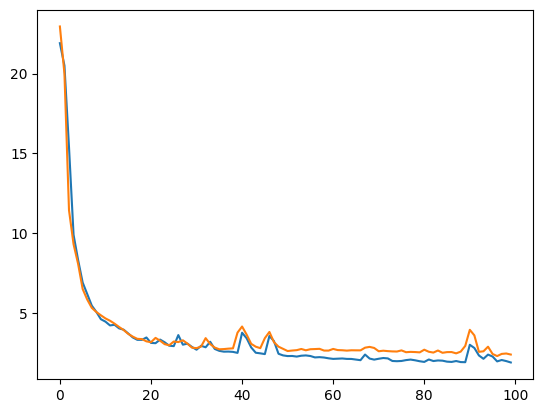

In [34]:
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])

In [21]:
from ann_visualizer.visualize import ann_viz

In [35]:
ann_viz(model, filename='filename.gv')

In [23]:
import graphviz

In [36]:
viz = graphviz.Source.from_file('filename.gv')

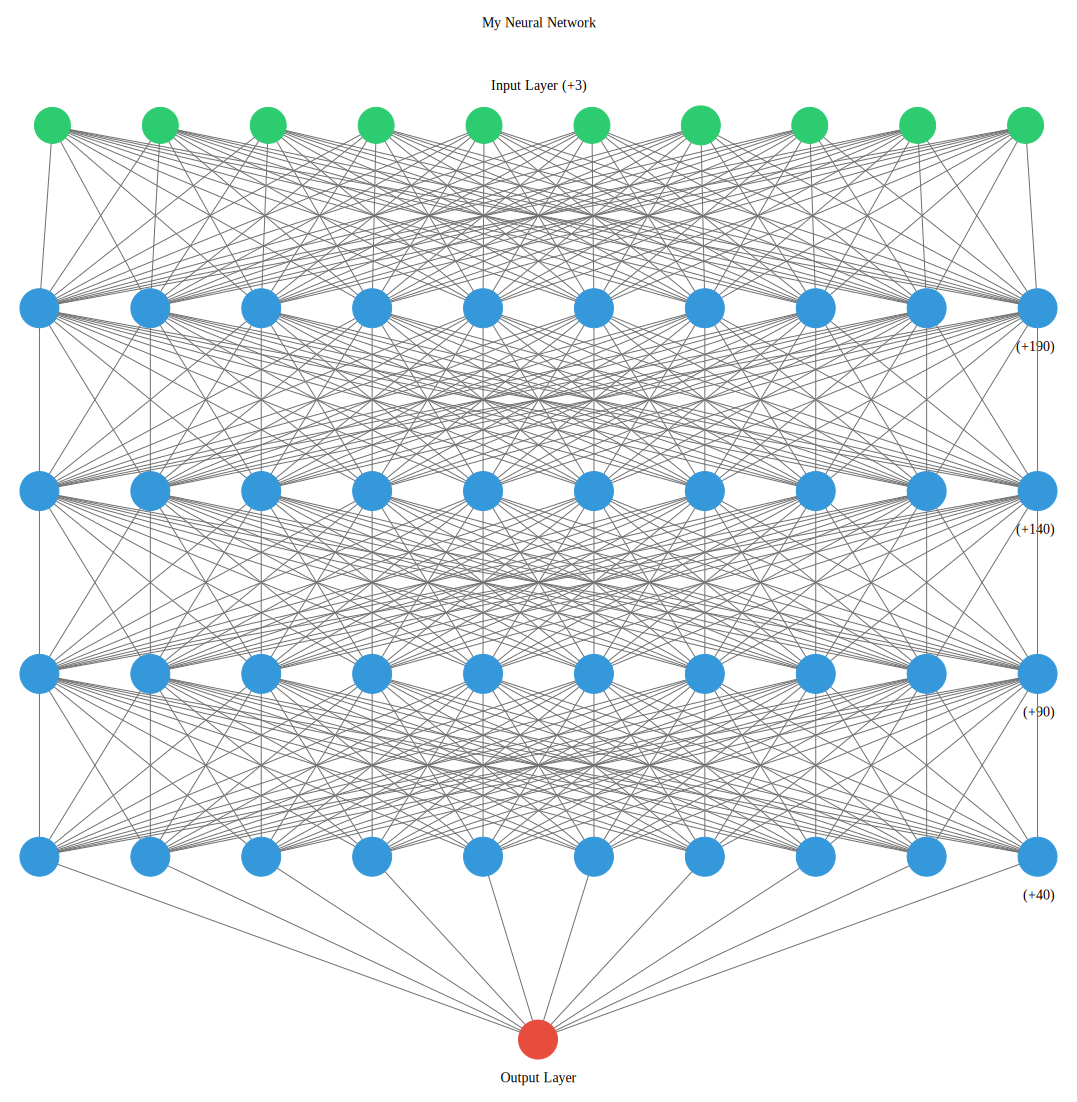

In [37]:
viz

In [38]:
test_results = model.evaluate(test_set_x, test_set_y)

4/4 [==============================] - 0s 6ms/step - loss: 34.7653 - mae: 4.5081


In [40]:
predicted_results = model.predict(test_set_x)

4/4 [==============================] - 0s 3ms/step


In [41]:
for i in range(len(predicted_results)):
  print(f"Predicted: {predicted_results[i]}, Actual: {test_set_y[i]}")

Predicted: [5.437176], Actual: 7.2
Predicted: [15.424371], Actual: 18.8
Predicted: [18.16167], Actual: 19.0
Predicted: [26.996275], Actual: 27.0
Predicted: [19.77218], Actual: 22.2
Predicted: [16.435726], Actual: 24.5
Predicted: [25.95791], Actual: 31.2
Predicted: [18.986464], Actual: 22.9
Predicted: [16.859493], Actual: 20.5
Predicted: [15.642793], Actual: 23.2
Predicted: [12.929012], Actual: 18.6
Predicted: [14.768374], Actual: 14.5
Predicted: [15.139668], Actual: 17.8
Predicted: [38.993107], Actual: 50.0
Predicted: [12.106343], Actual: 20.8
Predicted: [17.386553], Actual: 24.3
Predicted: [22.376036], Actual: 24.2
Predicted: [17.851355], Actual: 19.8
Predicted: [13.176432], Actual: 19.1
Predicted: [25.695011], Actual: 22.7
Predicted: [7.288604], Actual: 12.0
Predicted: [9.762061], Actual: 10.2
Predicted: [16.580746], Actual: 20.0
Predicted: [13.215782], Actual: 18.5
Predicted: [18.024578], Actual: 20.9
Predicted: [17.45961], Actual: 23.0
Predicted: [25.629835], Actual: 27.5
Predicted